In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
df=pd.read_csv("boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

<Axes: >

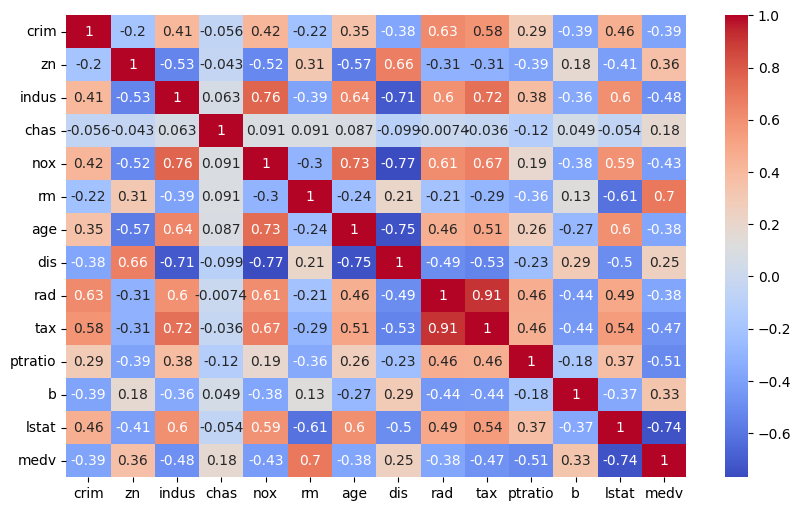

In [56]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [57]:
X=df.drop('medv',axis=1)
y=df['medv']


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=model.predict(X_test)

In [61]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [62]:
r2=r2_score(y_test,y_pred)

In [63]:
print(rmse,r2)

4.928602182665339 0.6687594935356317


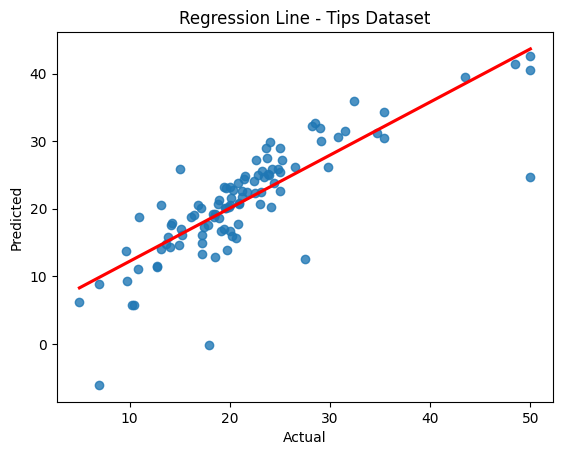

In [64]:
sns.regplot(x=y_test, y=y_pred, data=df, line_kws={"color":"red"},ci=None)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Regression Line - Tips Dataset')
plt.show()


In [65]:
# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 30.24675099392349
Coefficient: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [66]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [67]:
X_test_scaled=scaler.transform(X_test)

In [68]:
model1=LinearRegression()

In [69]:
model1.fit(X_train_scaled,y_train)

LinearRegression()

In [70]:
y_pred=model1.predict(X_test_scaled)

In [71]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [72]:
print(rmse)

4.928602182665336


In [73]:
r2_score=r2_score(y_test,y_pred)

In [74]:
print(r2_score)

0.668759493535632
